## SUPERVISED LEARNING -  CLASIFICATION 

This is for Coursera machine learning last asssignment.
The data that being used is churn telecomunication data set from Kaggle 
https://www.kaggle.com/blastchar/telco-customer-churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

The features are :

 0   customerID         
 1   gender             
 2   SeniorCitizen     
 3   Partner            
 4   Dependents        
 5   tenure              
 6   PhoneService       
 7   MultipleLines     
 8   InternetService    
 9   OnlineSecurity     
 10  OnlineBackup       
 11  DeviceProtection   
 12  TechSupport        
 13  StreamingTV        
 14  StreamingMovies    
 15  Contract           
 16  PaperlessBilling   
 17  PaymentMethod      
 18  MonthlyCharges    
 19  TotalCharges      
 20  Churn  

##### Importing necessary libraries

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

In [6]:
data = pd.read_csv('Telco-Customer-Churn.csv')

#### Explarotary Data Analysis (EDA)

##### Analyzing the dataset

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


######  Check null value

In [12]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [17]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting the total charges to numeric it was found that there are 11 null

In [19]:
#Removing missing values 
data.dropna(inplace = True)
#Remove customer IDs from the data set
df = data.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df2 = pd.get_dummies(df)
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


##### Analyzing the data using graphical method

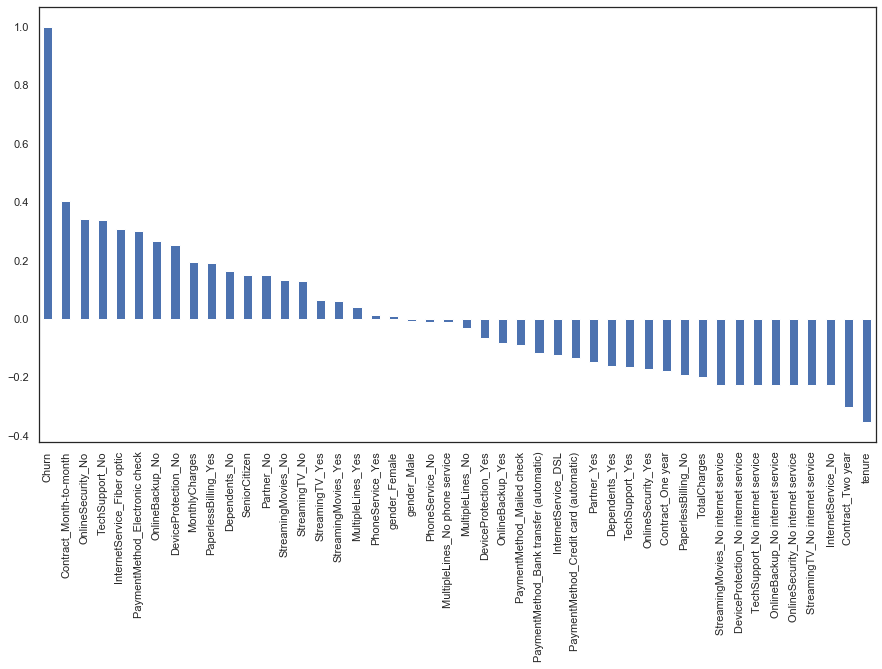

In [20]:
plt.figure(figsize=(15,8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

##### Check the churn rate

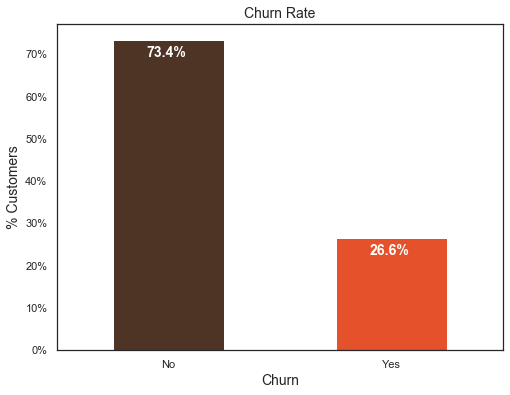

In [21]:
colors = ['#4D3425','#E4512B']
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

It was found from the dataset that total % churn is lower than the % who doesnt churn

###### After going through the above EDA we will develop some predictive models and compare them

We will use technique like : Logistic Regression, Decission Tree and Random Forrest and create comparisson

###### 1. Logistic Regression

In [22]:
y = df2['Churn'].values
X = df2.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [23]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
dlog = model.fit(X_train, y_train)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [28]:
y_train_pred_log = dlog.predict(X_train)
y_test_pred_log = dlog.predict(X_test)

In [29]:
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_log, 'train'),
                              measure_error(y_test, y_test_pred_log, 'test')],
                              axis=1)

train_test_full_error


,train,test
accuracy,0.802316,0.807583
precision,0.659130,0.638393
recall,0.566094,0.539623
f1,0.609080,0.584867


From the accuracy and precisson resulting in low value in using logistic regression

#### 2. Using Decission Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree = dt_tree.fit(X_train, y_train)

In [31]:
# The error on the training and test data sets
y_train_pred_tree = dt_tree.predict(X_train)
y_test_pred_tree = dt_tree.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_tree, 'train'),
                              measure_error(y_test, y_test_pred_tree, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.998171,0.723697
precision,1.000000,0.454073
recall,0.993279,0.494340
f1,0.996628,0.473351


Using the decission tree showing increase for accuracy and precission in train set, however there is less accuracy and precisssion in the test set. This showing overfitting

###### 3. Using Random Forrest

In [32]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
dt_rf = model_rf.fit(X_train, y_train)


In [33]:
# The error on the training and test data sets
y_train_pred_rf = dt_rf.predict(X_train)
y_test_pred_rf = dt_rf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_rf, 'train'),
                              measure_error(y_test, y_test_pred_rf, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.813333,0.808813
precision,0.710909,0.664122
recall,0.516513,0.490141
f1,0.598317,0.564019


Using random forest showing great increase the accuracy and precission in both training set and test set, showing no overfitting 

###### 4. Using Support Vector Machine

In [34]:
from sklearn.svm import SVC

dt_svm = SVC(kernel='linear') 
dt_svm= dt_svm.fit(X_train,y_train)

In [46]:
# The error on the training and test data sets
y_train_pred_svm = dt_svm.predict(X_train)
y_test_pred_svm = dt_svm.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_svm, 'train'),
                              measure_error(y_test, y_test_pred_svm, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.796267,0.807392
precision,0.645340,0.645833
recall,0.539630,0.523944
f1,0.587770,0.578538


SVM not showing overfitting but not increasing the accuracy and precission in train and test set 

###### 4. Using Boosting ( XG Boost)

###### Install xgboost module to anaconda

In [39]:
!pip install XGBoost

In [43]:
from xgboost import XGBClassifier

In [47]:
dt_xg = XGBClassifier()
dt_xg = dt_xg.fit(X_train, y_train)

In [49]:
# The error on the training and test data sets
y_train_pred_xg = dt_xg.predict(X_train)
y_test_pred_xg = dt_xg.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_xg, 'train'),
                              measure_error(y_test, y_test_pred_xg, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.951467,0.784648
precision,0.936664,0.585526
recall,0.879128,0.501408
f1,0.906985,0.540212


Using XGBoost is showing high increase in the accuracy of training set, however ot showing overfitting of the data

##### CONCLUSSION

1. Logistic regression showing low value in precission, however have high value in accuracy and not showing overfitting 
2. Decission tree showing high value in precission, however showing overfitting 
3. Random Forrest showing high value in precission and accuracy and not showing overfitting
4. SVM showing have low value in precission and accuracy, however it doesnt show overfitting
5. XGBoost showing high accuracy and precission but showing overfitting

Recomendation is to use the random forrest as model because it have high value in precission and accuracy and not overfit the dataset. 

Next action is by using tensorflow for further machine learning model to seek better model in accuracy and precission. 